Importing Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/ADMIN/Desktop/Capstone/BTC-USD Aug 22 - Aug 23.csv")

In [3]:
df.head()

Date          Open          High           Low         Close  \
0  2022-08-01  23336.718750  23464.787109  22890.796875  23314.199219   
1  2022-08-02  23308.433594  23415.041016  22710.083984  22978.117188   
2  2022-08-03  22981.302734  23578.650391  22747.835938  22846.507813   
3  2022-08-04  22848.214844  23198.009766  22485.701172  22630.957031   
4  2022-08-05  22626.833984  23422.828125  22612.177734  23289.314453   

      Adj Close       Volume  
0  23314.199219  25849159141  
1  22978.117188  28389250717  
2  22846.507813  26288169966  
3  22630.957031  25120229769  
4  23289.314453  28881249043

Checking for Null/Missing Values

In [4]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


OUTLIER DETECTION

Using IQR Method

In [5]:


# Calculate the IQR for each attribute
q1 = df[['Open', 'High', 'Low','Close','Adj Close','Volume']].describe().loc['25%']
q3 = df[['Open', 'High', 'Low','Close','Adj Close','Volume']].describe().loc['75%']
iqr = q3 - q1

# Identify potential outliers with a value less than Q1 - 1.5*IQR or greater than Q3 + 1.5*IQR
potential_outliers = (df[['Open', 'High', 'Low','Close','Adj Close','Volume']] < (q1 - 1.5*iqr)) | (df[['Open', 'High', 'Low','Close','Adj Close','Volume']] > (q3 + 1.5*iqr))
print(potential_outliers.sum())


Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume       10
dtype: int64


Removing the above Outliers

In [6]:

df = df[~potential_outliers.any(axis=1)]


Checking Data Types

In [7]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

NORMALISATION

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the 'Open', 'High', and 'Low' columns
df[['Open', 'High', 'Low','Close','Adj Close','Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low','Close','Adj Close','Volume']])


In [9]:
df.head()

Date      Open      High       Low     Close  Adj Close    Volume
0  2022-08-01  0.481406  0.463436  0.484170  0.479765   0.479765  0.415703
1  2022-08-02  0.479603  0.460239  0.472171  0.458343   0.458343  0.470223
2  2022-08-03  0.458757  0.470753  0.474677  0.449954   0.449954  0.425125
3  2022-08-04  0.450276  0.446292  0.457272  0.436215   0.436215  0.400057
4  2022-08-05  0.436168  0.460739  0.465670  0.478179   0.478179  0.480783

FEATURE ENGINEERING

In [11]:

# Add a new column for the daily price range
df['Range'] = df['High'] - df['Low']

# Add a new column for the daily price change
df['Change'] = df['Close'] - df['Open']


# Add a new column for the ratio between the daily price range and the daily price change
df['Range_Change_Ratio'] = df['Range'] / df['Change']




Range_Change_Ratio: The ratio between the daily price range and the daily price change.

In [12]:
df.head()

Date      Open      High       Low     Close  Adj Close    Volume  \
0  2022-08-01  0.481406  0.463436  0.484170  0.479765   0.479765  0.415703   
1  2022-08-02  0.479603  0.460239  0.472171  0.458343   0.458343  0.470223   
2  2022-08-03  0.458757  0.470753  0.474677  0.449954   0.449954  0.425125   
3  2022-08-04  0.450276  0.446292  0.457272  0.436215   0.436215  0.400057   
4  2022-08-05  0.436168  0.460739  0.465670  0.478179   0.478179  0.480783   

      Range    Change  Range_Change_Ratio  
0 -0.020734 -0.001641           12.636178  
1 -0.011932 -0.021260            0.561227  
2 -0.003925 -0.008803            0.445869  
3 -0.010980 -0.014061            0.780869  
4 -0.004930  0.042010           -0.117363

## VISUALISATION 

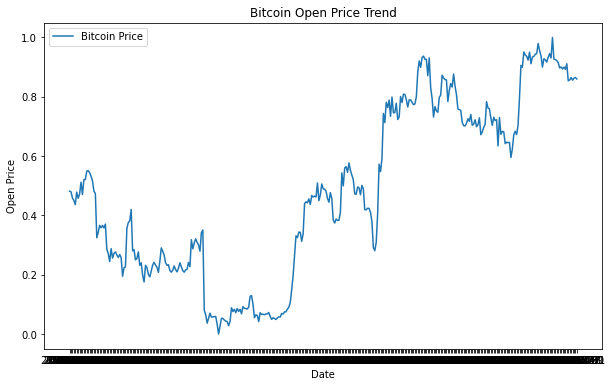

In [13]:
#Basic Line Plot for Open Price:

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], label='Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Bitcoin Open Price Trend')
plt.legend()
plt.show()


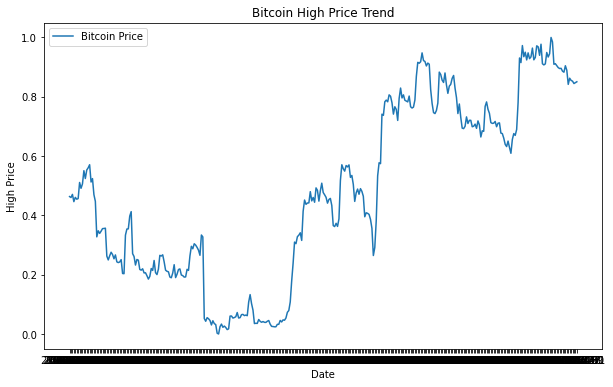

In [19]:
#Basic Line Plot for High Price:

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], label='Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('Bitcoin High Price Trend')
plt.legend()
plt.show()


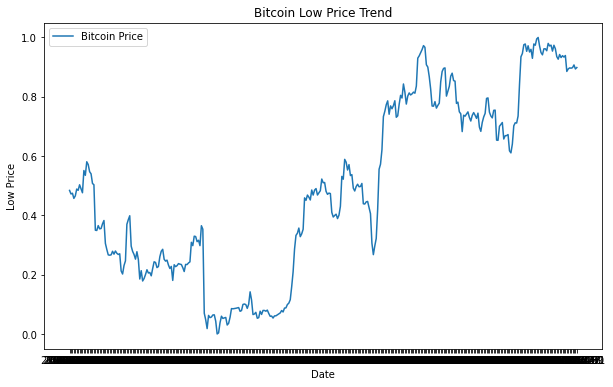

In [20]:
#Basic Line Plot for Low Price:

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Low'], label='Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Bitcoin Low Price Trend')
plt.legend()
plt.show()


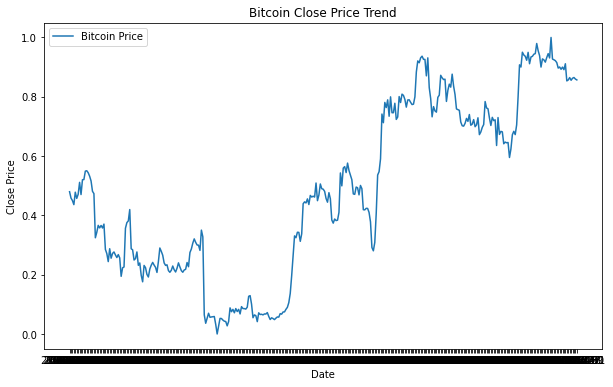

In [21]:
#Basic Line Plot for Close Price:

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Bitcoin Close Price Trend')
plt.legend()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3848\1149081713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc['Date'] = pd.to_datetime(ohlc['Date'])


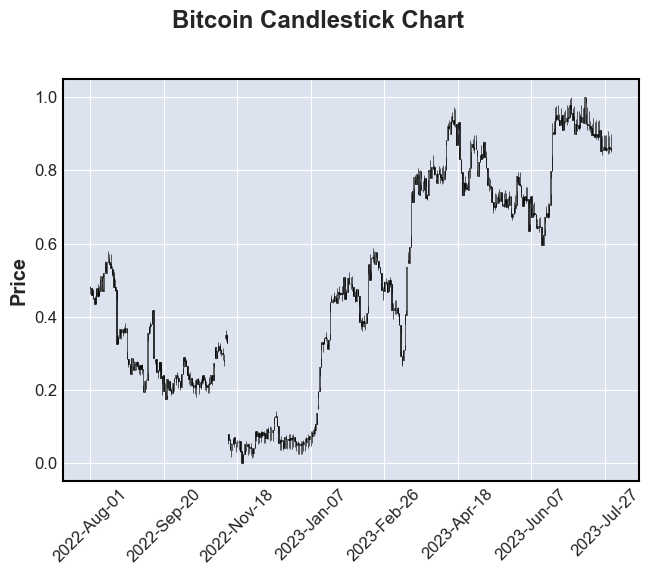

In [14]:
import mplfinance as mpf

ohlc = df[['Date', 'Open', 'High', 'Low', 'Close']]  # Assuming these columns exist
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc.set_index('Date', inplace=True)

mpf.plot(ohlc, type='candle', title='Bitcoin Candlestick Chart')


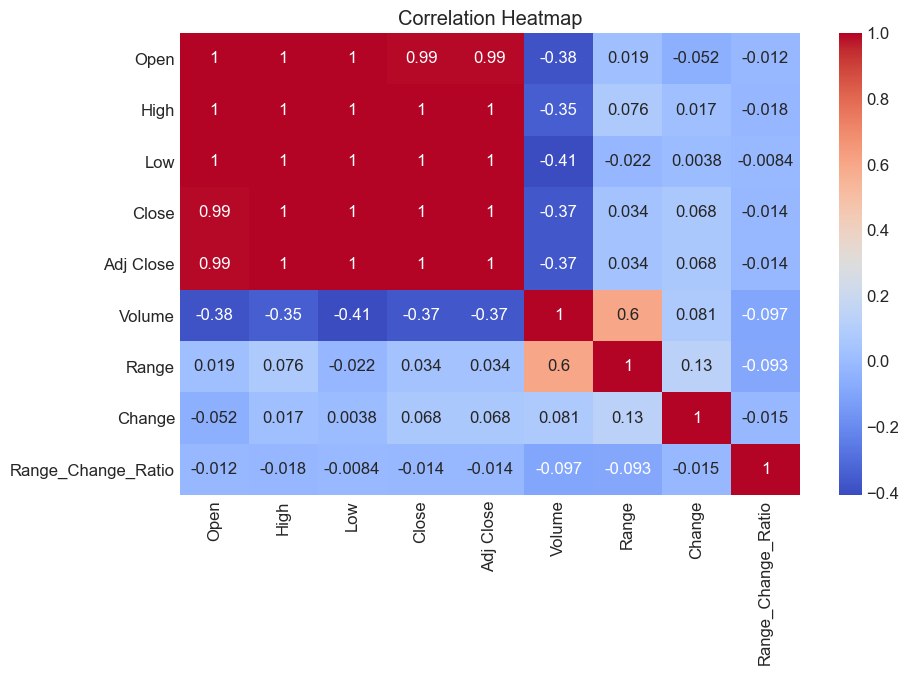

In [15]:
#Correlation Heatmap:

corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


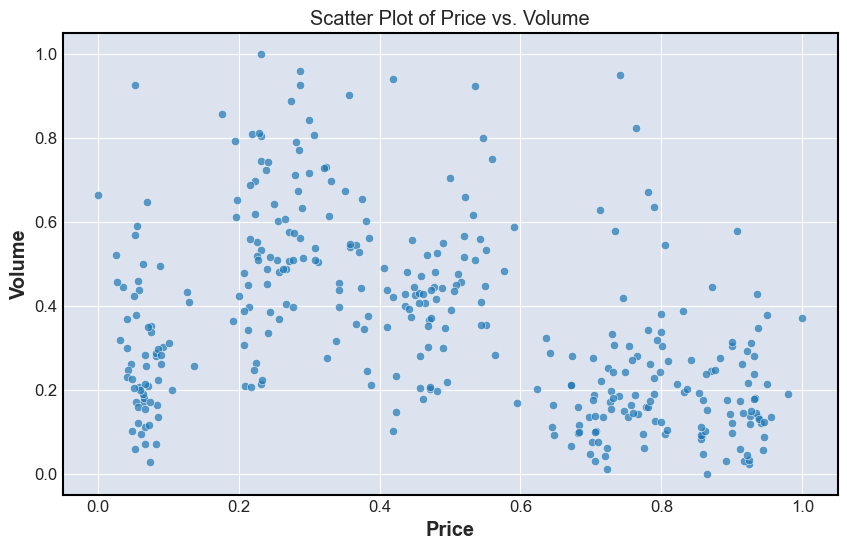

In [17]:
#Scatter Plot with Trend Line

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Volume', data=df, alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Volume')
plt.title('Scatter Plot of Price vs. Volume')
plt.show()

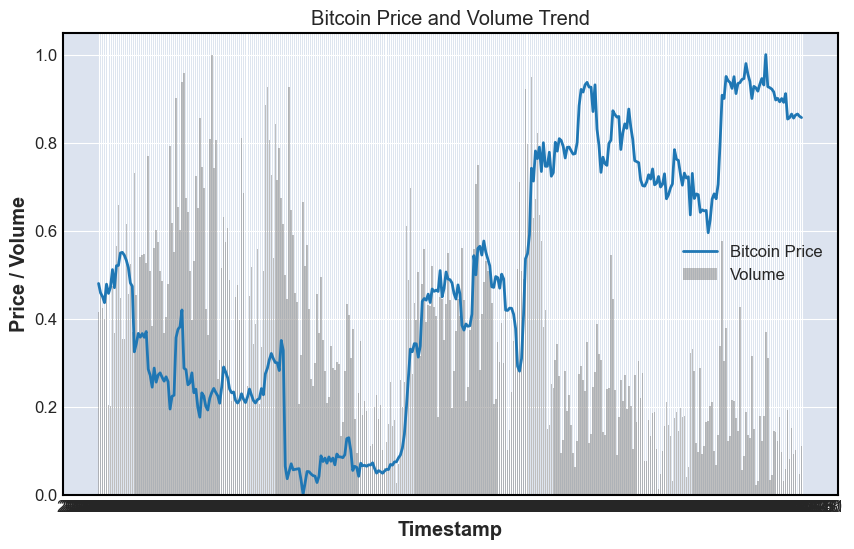

In [18]:
#Volume and Price Trend

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Bitcoin Price')
plt.bar(df['Date'], df['Volume'], alpha=0.5, color='gray', label='Volume')
plt.xlabel('Timestamp')
plt.ylabel('Price / Volume')
plt.title('Bitcoin Price and Volume Trend')
plt.legend()
plt.show()


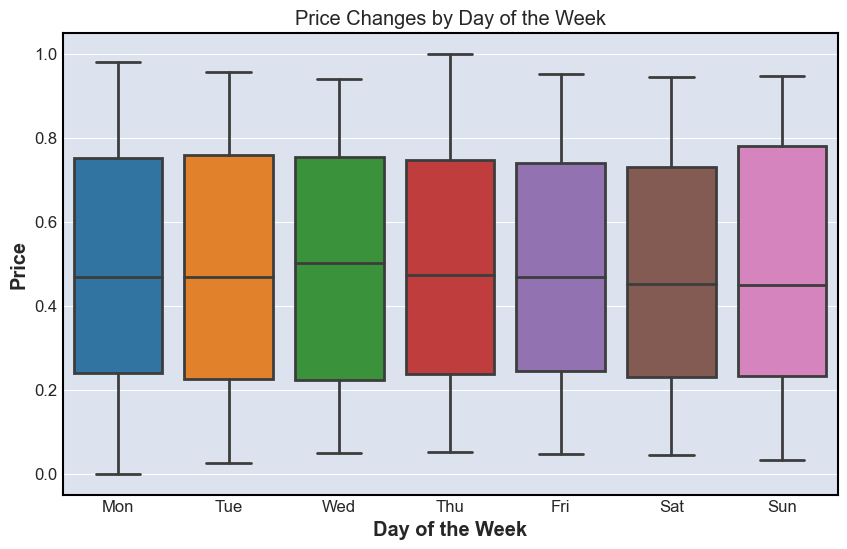

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'day_of_week' column (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['Date'].dt.dayofweek

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='Adj Close', data=df)
plt.xlabel('Day of the Week')
plt.ylabel('Price')
plt.title('Price Changes by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

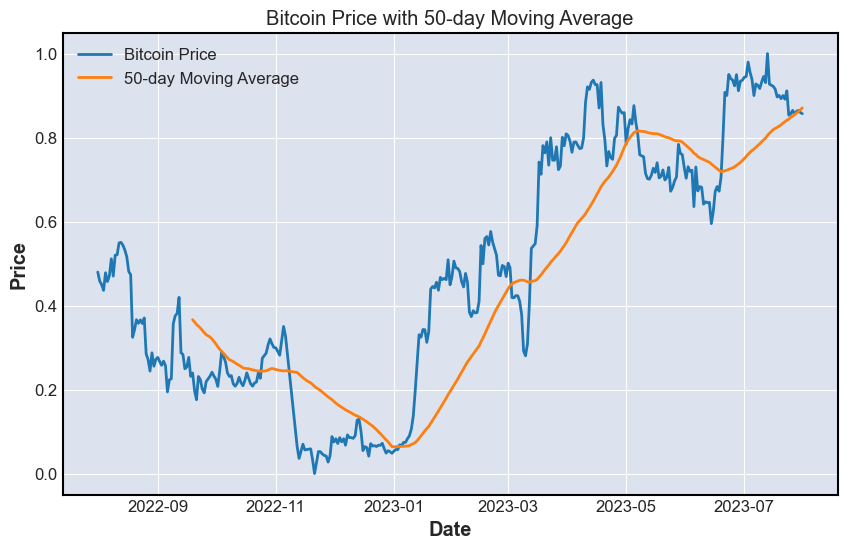

In [24]:
df['50_MA'] = df['Adj Close'].rolling(window=50).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Bitcoin Price')
plt.plot(df['Date'], df['50_MA'], label='50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price with 50-day Moving Average')
plt.legend()
plt.show()

The plot displays both the Bitcoin price and the 50-day moving average

#### A 50-day moving average (50-day MA) is a technical analysis indicator used in finance and investing to smooth out short-term fluctuations in price data over a 50-day period

##### Calculation: To calculate the 50-day moving average for a specific day, you sum up the closing prices of the previous 50 days and then divide the sum by 50.

##### Sliding Window: As each new day's data becomes available, you update the moving average by including the new day's closing price and excluding the oldest day's closing price. This creates a "sliding window" of the most recent 50 days.

##### Smoothing: The moving average smooths out the price data by reducing the impact of short-term price fluctuations, making it easier to identify long-term trends.